# Chapter 3: Linear Regression for a housing dataset

### Importing the necessary packages

In [55]:
from matplotlib import pyplot as plt
import sklearn as sk
import numpy as np
import random

### Defining and plotting our dataset

In [56]:
features = np.array([1,2,3,5,6,7])
labels = np.array([155, 197, 244, 356,407,448])

print(features)
print(labels)

[1 2 3 5 6 7]
[155 197 244 356 407 448]


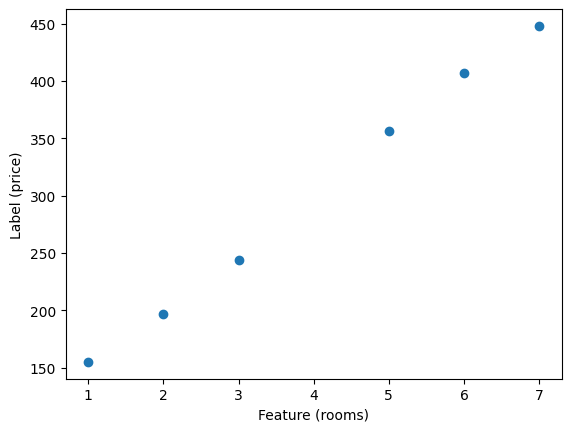

In [57]:
plt.scatter(features, labels)
plt.xlabel('Feature (rooms)')
plt.ylabel('Label (price)')
plt.show()

### Coding the tricks

- Simple trick
- Absolute trick
- Square trick

In [58]:
def simple_trick(base_price, price_per_room, num_rooms, price):
    small_random_1 = random.random()*0.1
    small_random_2 = random.random()*0.1
    predicted_price = base_price + price_per_room*num_rooms
    
    if price > predicted_price and num_rooms > 0:
        price_per_room += small_random_1
        base_price += small_random_2
    if price > predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    if price < predicted_price and num_rooms > 0:
        price_per_room -= small_random_1
        base_price -= small_random_2
    if price < predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    return price_per_room, base_price

In [59]:
def absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room*num_rooms
    if price > predicted_price:
        price_per_room += learning_rate*num_rooms
        base_price += learning_rate
    else:
        price_per_room -= learning_rate*num_rooms
        base_price -= learning_rate
    return price_per_room, base_price

In [60]:
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room*num_rooms
    price_per_room += learning_rate*num_rooms*(price-predicted_price)
    base_price += learning_rate*(price-predicted_price)
    return price_per_room, base_price

### Running the linear regression algorithm

The linear regression algorithm consists of:
- Starting with random weights
- Iterating the square (or simple, or absolute) trick many times.

In [61]:
import random

# We set the random seed in order to always get the same results.
random.seed(0)

In [62]:

def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    for epoch in range(epochs):
        # Uncomment any of the following lines to plot different epochs
        #if epoch == 1:
        #if epoch <= 10:
        #if epoch <= 50:
        #if epoch > 50:
        plt.plot(features, price_per_room * features + base_price, c='gray', alpha=0.5, zorder=1)
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        # Uncomment any of the 2 following lines to use a different trick
        #price_per_room, base_price = absolute_trick(base_price,
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    plt.plot(features, price_per_room * features + base_price, c='black')
    plt.scatter(features, labels, zorder=2)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price

Price per room: 51.04430678220095
Base price: 91.59448307644864


(np.float64(51.04430678220095), np.float64(91.59448307644864))

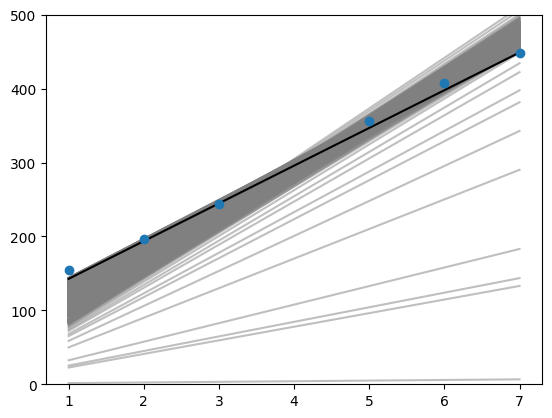

In [63]:

# This line is for the x-axis to appear in the figure
plt.ylim(0,500)
linear_regression(features, labels, learning_rate = 0.01, epochs = 1000)

### Root mean squared error function

In [64]:
# The root mean square error function
def rmse(labels, predictions):
    n = len(labels)
    differences = np.subtract(labels, predictions)
    return np.sqrt(1.0/n * (np.dot(differences, differences)))

### Plotting the error function

Price per room: 50.65781332767556
Base price: 99.79504258184782
RMSE: 4.96255377585284


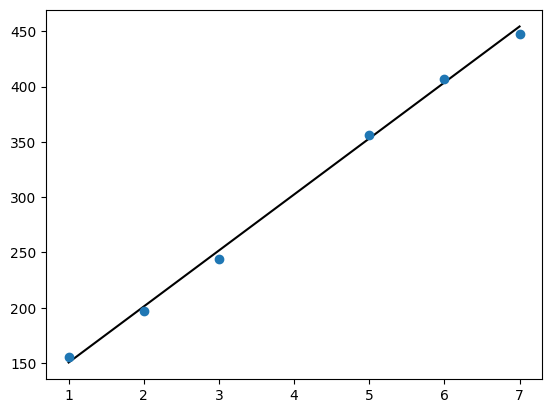

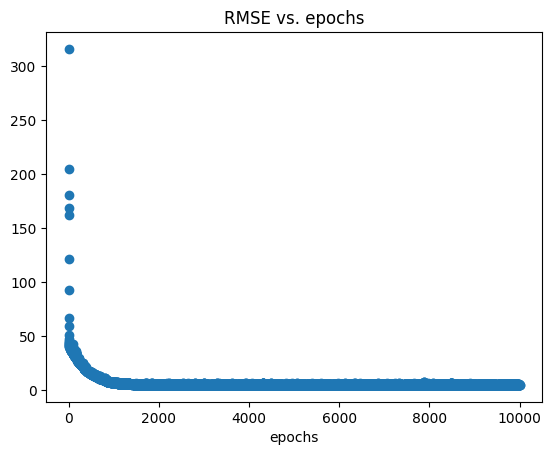

(np.float64(50.65781332767556), np.float64(99.79504258184782))

In [65]:
def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    errors = []
    for i in range(epochs):
        predictions = features*price_per_room+base_price
        errors.append(rmse(labels, predictions))
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        # Uncomment one of the following 3 lines to use the simple, the absolute, or the square trick
        #price_per_room, base_price = simple_trick(base_price,
        #price_per_room, base_price = absolute_trick(base_price,
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    plt.plot(features, price_per_room * features + base_price, c='black')
    plt.scatter(features, labels, zorder=2)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    print('RMSE:', errors[-1])
    plt.show()
    plt.scatter(range(len(errors)), errors)
    plt.title('RMSE vs. epochs')
    plt.xlabel('epochs')
    plt.show()
    return price_per_room, base_price

linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)

# SKlearn linear reg

In [ ]:
from sklearn.linear_model import LinearRegression

In [90]:
# Reshape чтобы преобразовать строку в матрицу 6x1
features = np.array([1,2,3,5,6,7]).reshape(-1, 1)
labels = np.array([155, 197, 244, 356,407,448]).reshape(-1, 1)
print(features)
print(labels)

[[1]
 [2]
 [3]
 [5]
 [6]
 [7]]
[[155]
 [197]
 [244]
 [356]
 [407]
 [448]]


In [91]:
model = LinearRegression()
model.fit(features, labels)
print(model.coef_, model.intercept_)
print(f"Prediction on 5 rooms {model.predict([[5]])}")


[[50.39285714]] [99.5952381]
Prediction on 5 rooms [[351.55952381]]
